#Assignment 2: Fitting Data and Chemometrics

In [1]:
"""
This cell contains code for loading the pyMCr module used in the notebook as
well as importing data used. This cell has to be run once everytime the notebook
is started up and will give errors ('fatal: ..') when run multiple times.
"""

import os
!git clone https://github.com/usnistgov/pyMCR.git

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
os.chdir("pyMCR/")
from pymcr.regressors import OLS, NNLS
from pymcr.constraints import ConstraintNonneg, ConstraintNorm
import sys
import logging

"Preamble required for Mcr-AR to work:"
from pymcr.mcr import McrAR
logger = logging.getLogger('pymcr')
logger.setLevel(logging.DEBUG)
stdout_handler = logging.StreamHandler(stream=sys.stdout)
stdout_format = logging.Formatter('%(message)s')
stdout_handler.setFormatter(stdout_format)
logger.addHandler(stdout_handler)
os.chdir("..")

#Importing data
!git clone https://github.com/andysardjan/data-for-topics-in-chemistry-with-python.git

Cloning into 'pyMCR'...
remote: Enumerating objects: 1866, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 1866 (delta 113), reused 221 (delta 110), pack-reused 1637
Receiving objects: 100% (1866/1866), 7.25 MiB | 26.52 MiB/s, done.
Resolving deltas: 100% (1214/1214), done.
Cloning into 'data-for-topics-in-chemistry-with-python'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 9), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 1.83 MiB | 4.87 MiB/s, done.
Resolving deltas: 100% (9/9), done.


#Least Squares Fitting

This assignment has two parts, in the first part we are going the estimate molar absorbances from data. In the second part we are going to analyse kinetic data using multivariate curve resolution.

First we are going to calculate Molar absorbances of a complex called copper phthalocyanine.
You can load in the data using dat = pd.read_csv('filename.csv'). Then you can get the concentrations use dat['Cu_10uM'] to get the absorbance data for the 10 uM sample.

In [2]:
datCu = pd.read_csv('data-for-topics-in-chemistry-with-python/cu_dat.dat', delimiter = '\t')

#pd.read_csv : reads data from a CSV(Comma seperated values) file and loads it into a pandas Dataframe,which is a 2D table of data with rows and columns
#delimiter: one or more character in a sequence used to specify the boundary between seperate regions in a text
# '\t' : here is a tab character, i.e., the values in the CSV files are seperated by tabs.

You can inspect the loaded data when just running the variable name itself:

In [3]:
datCu                 #running the variable name loads the data

,Wavelength [nm],Wavenumbers [1/cm],Cu_10uM,"Cu_12,5uM",Cu_25uM,Cu_50uM,Cu_5uM
0,183.0,54644.81,0.18860,0.205300,0.299000,0.19860,0.22440
1,183.5,54495.91,0.10690,-0.053620,0.133300,0.07198,0.02128
2,184.0,54347.83,-0.00850,-0.147800,-0.019470,-0.07377,-0.02258
3,184.5,54200.54,-0.04847,-0.013470,-0.023280,-0.10830,0.12500
4,185.0,54054.05,-0.01226,0.125200,0.101200,-0.05022,0.11370
...,...,...,...,...,...,...,...
1669,1017.5,9828.01,0.04374,0.001273,0.006675,0.02255,0.03686
1670,1018.0,9823.18,0.04512,0.002456,0.012470,0.01901,0.03794
1671,1018.5,9818.36,0.04969,0.008075,0.015360,0.02125,0.04092
1672,1019.0,9813.54,0.05452,0.010640,0.016600,0.02563,0.04394


You can get the data out using the names of the columns, for example datCu['Wavelength [nm]'] returns the wavelength data, and datCu['Cu_10uM'] returns the data for 10 $\mu$M.

In [4]:
#Extracting the wavelength data using the name of the column
datCu['Wavelength [nm]']

0        183.0
1        183.5
2        184.0
3        184.5
4        185.0
         ...  
1669    1017.5
1670    1018.0
1671    1018.5
1672    1019.0
1673    1019.5
Name: Wavelength [nm], Length: 1674, dtype: float64

In [5]:
#Extracting the 10uM concentration data using the name of the column
datCu['Cu_10uM']

0       0.18860
1       0.10690
2      -0.00850
3      -0.04847
4      -0.01226
         ...   
1669    0.04374
1670    0.04512
1671    0.04969
1672    0.05452
1673    0.05663
Name: Cu_10uM, Length: 1674, dtype: float64

# Plotting
Make two plots of the all the given data (datCu all conccentrations), part of the code is given allready, each plot should contain all the different concentration data and have proper labels


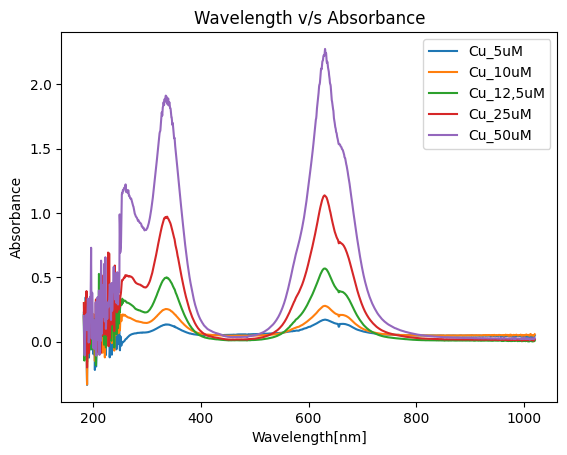

In [6]:
# Plotting wavelength v/s absorbance for all the concentrations

plt.plot(datCu['Wavelength [nm]'],datCu['Cu_5uM'],label = 'Cu_5uM')
plt.plot(datCu['Wavelength [nm]'],datCu['Cu_10uM'],label = 'Cu_10uM')
plt.plot(datCu['Wavelength [nm]'],datCu['Cu_12,5uM'],label = 'Cu_12,5uM')
plt.plot(datCu['Wavelength [nm]'],datCu['Cu_25uM'],label = 'Cu_25uM')
plt.plot(datCu['Wavelength [nm]'],datCu['Cu_50uM'],label = 'Cu_50uM')
plt.xlabel('Wavelength[nm]')
plt.ylabel('Absorbance')
plt.title('Wavelength v/s Absorbance')
plt.legend()
plt.show()

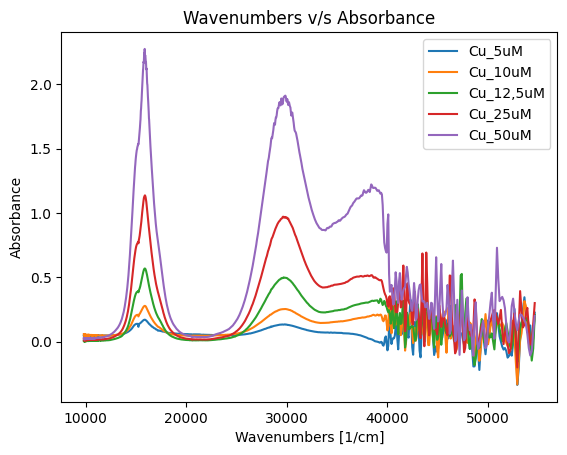

In [7]:
#Plotting Wavenumbers v/s absorbance for all the concentrations

plt.plot(datCu['Wavenumbers [1/cm]'],datCu['Cu_5uM'],label = 'Cu_5uM')
plt.plot(datCu['Wavenumbers [1/cm]'],datCu['Cu_10uM'],label = 'Cu_10uM')
plt.plot(datCu['Wavenumbers [1/cm]'],datCu['Cu_12,5uM'],label = 'Cu_12,5uM')
plt.plot(datCu['Wavenumbers [1/cm]'],datCu['Cu_25uM'],label = 'Cu_25uM')
plt.plot(datCu['Wavenumbers [1/cm]'],datCu['Cu_50uM'],label = 'Cu_50uM')
plt.xlabel('Wavenumbers [1/cm]')
plt.ylabel('Absorbance')
plt.title('Wavenumbers v/s Absorbance')
plt.legend()
plt.show()

We observe that there are negative values for absorbance. So we neglect those values and plot a different graph. Also, we remove the curves obtained by either the noises, solvent absorption or the impurity peaks by setting the x limit.

In [8]:
# consider only the positive values in the datCu table.
datCu_positive = datCu[datCu>=0]

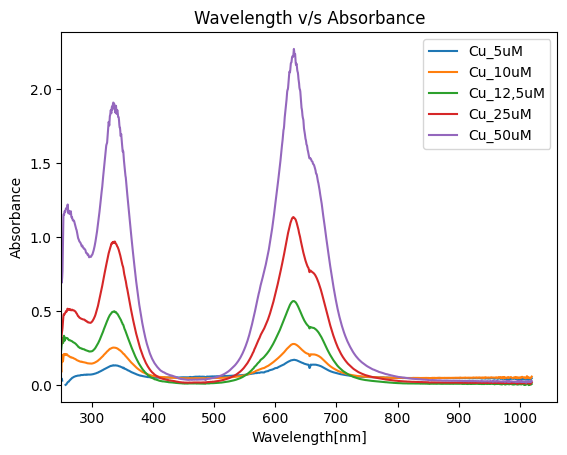

In [9]:
# Plotting wavenumbers v/s absorbance for all the concentrations
plt.plot(datCu_positive['Wavelength [nm]'],datCu_positive['Cu_5uM'],label = 'Cu_5uM')
plt.plot(datCu_positive['Wavelength [nm]'],datCu_positive['Cu_10uM'],label = 'Cu_10uM')
plt.plot(datCu_positive['Wavelength [nm]'],datCu_positive['Cu_12,5uM'],label = 'Cu_12,5uM')
plt.plot(datCu_positive['Wavelength [nm]'],datCu_positive['Cu_25uM'],label = 'Cu_25uM')
plt.plot(datCu_positive['Wavelength [nm]'],datCu_positive['Cu_50uM'],label = 'Cu_50uM')
plt.xlim(left = 250)
plt.xlabel('Wavelength[nm]')
plt.ylabel('Absorbance')
plt.title('Wavelength v/s Absorbance')
plt.legend()
plt.show()

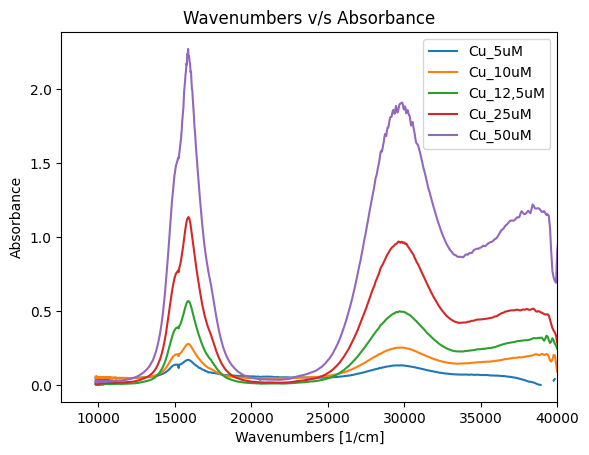

In [10]:
# Plotting wavelength v/s absorbance for all the concentrations
plt.plot(datCu_positive['Wavenumbers [1/cm]'],datCu_positive['Cu_5uM'],label = 'Cu_5uM')
plt.plot(datCu_positive['Wavenumbers [1/cm]'],datCu_positive['Cu_10uM'],label = 'Cu_10uM')
plt.plot(datCu_positive['Wavenumbers [1/cm]'],datCu_positive['Cu_12,5uM'],label = 'Cu_12,5uM')
plt.plot(datCu_positive['Wavenumbers [1/cm]'],datCu_positive['Cu_25uM'],label = 'Cu_25uM')
plt.plot(datCu_positive['Wavenumbers [1/cm]'],datCu_positive['Cu_50uM'],label = 'Cu_50uM')
plt.xlabel('Wavenumbers [1/cm]')
plt.ylabel('Absorbance')
plt.xlim(right=40000)
plt.title('Wavenumbers v/s Absorbance')
plt.legend()
plt.show()

# Fitting
Now we will do fitting on the absorbance peak values to calculate molar absorbances. According to the Lambert-Beer law:
$$
A_\lambda = \epsilon_\lambda c l
$$
We should be able to calculate $\epsilon_\lambda$ at a particular wavelength, using the absorbances and concentrations. The datasets given have the concentrations in the column names, and the pathlengths (l) is always 1 cm. So by doing a linear fit: $y = ax$, where y is the absorbance values, x the concentrations and the slope a should be the molar absorbance then. To fit the function we first have to get out the correct absorbance values. We can get certain values out of a dataframe using the indices, example:

In [11]:
datCu[0:5] # extracts the data from row 0 to 5

,Wavelength [nm],Wavenumbers [1/cm],Cu_10uM,"Cu_12,5uM",Cu_25uM,Cu_50uM,Cu_5uM
0,183.0,54644.81,0.18860,0.20530,0.29900,0.19860,0.22440
1,183.5,54495.91,0.10690,-0.05362,0.13330,0.07198,0.02128
2,184.0,54347.83,-0.00850,-0.14780,-0.01947,-0.07377,-0.02258
3,184.5,54200.54,-0.04847,-0.01347,-0.02328,-0.10830,0.12500
4,185.0,54054.05,-0.01226,0.12520,0.10120,-0.05022,0.11370


This gives the first 5 data points for all the columns, we want to find the absorbance values around a peak. Using the graphs above we can estimate that one of the maxima is around 350 nm, so by trial and error we do:

In [12]:
datCu_positive[300:310] # extracts the data from row 300 to 310

,Wavelength [nm],Wavenumbers [1/cm],Cu_10uM,"Cu_12,5uM",Cu_25uM,Cu_50uM,Cu_5uM
300,333.0,30030.03,0.2506,0.4923,0.9567,1.885,0.1303
301,333.5,29985.01,0.2512,0.4938,0.9638,1.864,0.1317
302,334.0,29940.12,0.2519,0.4944,0.9633,1.874,0.1315
303,334.5,29895.37,0.2525,0.4951,0.9617,1.901,0.1314
304,335.0,29850.75,0.2528,0.4962,0.9672,1.911,0.1329
305,335.5,29806.26,0.2527,0.4961,0.9685,1.909,0.1336
306,336.0,29761.90,0.2526,0.4954,0.9633,1.904,0.1326
307,336.5,29717.68,0.2526,0.4972,0.9629,1.903,0.1317
308,337.0,29673.59,0.2527,0.4986,0.9674,1.896,0.1315
309,337.5,29629.63,0.2524,0.4959,0.9704,1.874,0.1316


We have to find a range where all the (local) maxima are, then we can use the .max() method to get out the maxima themselves:


In [13]:
datCu_positive[300:310].max() # gets the maximum out of all the data between 300 and 310

Wavelength [nm]         337.5000
Wavenumbers [1/cm]    30030.0300
Cu_10uM                   0.2528
Cu_12,5uM                 0.4986
Cu_25uM                   0.9704
Cu_50uM                   1.9110
Cu_5uM                    0.1336
dtype: float64

Next we can get out the maxima by removing the wavelength and wavenumbers data:
We can also make the concentration list from the labels.

In [14]:
# defining the x and y-axis data

y_firstmax = datCu_positive[300:310].max()[2:]   # this gets indices 300 - 310 from dataCu (which is 333 nm to 337.5 nm), then gets the maxima of the absorbances
x = [10E-6, 12.5E-6, 25E-6, 50E-6, 5E-6]         # the concentrations

Next we plot just the absorbance maximum data versus concentration:

Text(0, 0.5, 'Absorbance')

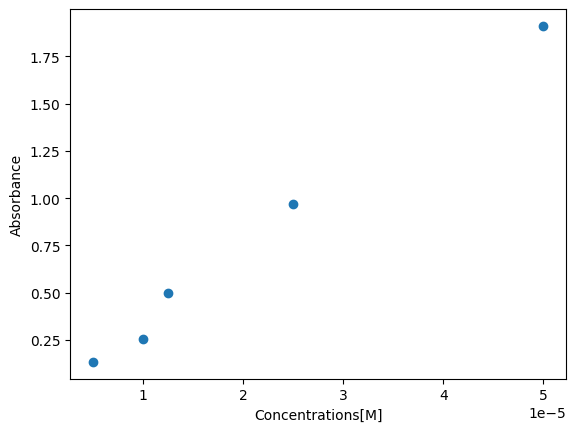

In [15]:
#plotting the concentration v/s maximum absorbances

plt.plot(x, y_firstmax, 'o')                    # 'o' gives the circle marker
plt.xlabel('Concentrations[M]')
plt.ylabel('Absorbance')

Looks (more or less) linear! Now we still have to do the fit. We can use the scipy.optimize.curve_fit() method. If we look at the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

We need to fill in: (f, xdata, ydata) where f is the function we want to use to fit the data. Define a linear function based on the lambert-Beer law and fit the data, also plot the result together with the data to see if the fit was succesfull. Note that the pathlengs for all these experiments is 1 cm.

Text(0, 0.5, 'Absorbance')

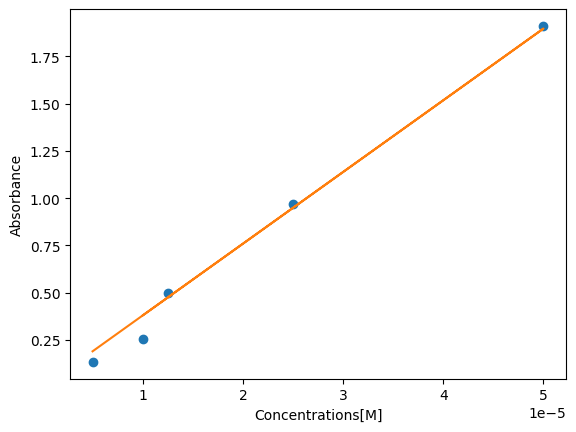

In [16]:
# LINEAR FITTING

# defining the function for the linear fit
def linear(x, a):                                  # the function takes x - concentrations and a - the slope
  return(a*x)                                      # returns y = ax
fit1 = curve_fit(linear, x, y_firstmax)[0]         # does curve_fitting for the linear function and [0] returns the first element of the output returned by the fitting (here, slope)

# plotting the original data as circles and overlaying the linear fit
plt.plot(x, y_firstmax, 'o')
plt.plot(x, linear(x, fit1))
plt.xlabel('Concentrations[M]')
plt.ylabel('Absorbance')

In [33]:
fit1[0]

37941.577981651375

Now we have calculated the molar absorbance for Cu at 340 nm, do the same for the other peak for Cu and the peaks.

In [17]:
# Molar Absorbance for peak around 650nm - PEAK 2

datCu_positive[890:905]           # using trial and error method to find the wavelength around 650nm from the graph

,Wavelength [nm],Wavenumbers [1/cm],Cu_10uM,"Cu_12,5uM",Cu_25uM,Cu_50uM,Cu_5uM
890,628.0,15923.57,0.2761,0.5650,1.130,2.224,0.1690
891,628.5,15910.90,0.2767,0.5664,1.132,2.222,0.1692
892,629.0,15898.25,0.2767,0.5672,1.134,2.220,0.1693
893,629.5,15885.62,0.2766,0.5672,1.136,2.227,0.1692
894,630.0,15873.02,0.2770,0.5672,1.135,2.249,0.1696
895,630.5,15860.43,0.2775,0.5676,1.133,2.274,0.1704
896,631.0,15847.86,0.2772,0.5671,1.130,2.256,0.1704
897,631.5,15835.31,0.2764,0.5656,1.129,2.228,0.1697
898,632.0,15822.78,0.2761,0.5636,1.126,2.239,0.1693
899,632.5,15810.28,0.2757,0.5621,1.124,2.240,0.1689


In [18]:
datCu_positive[890:905].max()       # finding the maximum between wavelength

Wavelength [nm]         635.0000
Wavenumbers [1/cm]    15923.5700
Cu_10uM                   0.2775
Cu_12,5uM                 0.5676
Cu_25uM                   1.1360
Cu_50uM                   2.2740
Cu_5uM                    0.1704
dtype: float64

Text(0, 0.5, 'Absorbance')

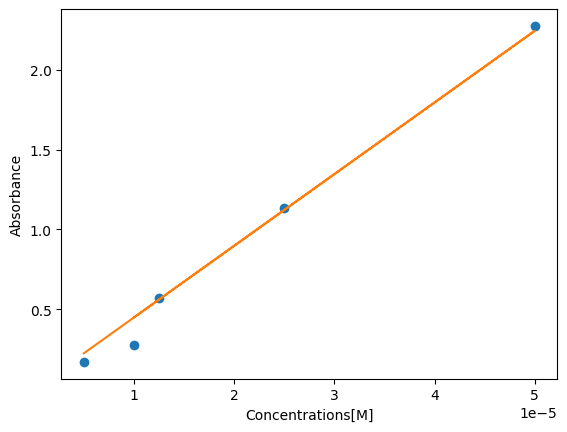

In [19]:
# LINEAR FITTING - PEAK 2

y_secmax = datCu_positive[860:905].max()[2:]         # this gets indices 860 untill 905 from dataCo (which is 628 nm to 635 nm), then gets the maxima of the absorbances
x = [10E-6, 12.5E-6, 25E-6, 50E-6, 5E-6]             # the concentrations

# defining the linear fit sunction
def linear(x, a):
  return(a*x)
fit2 = curve_fit(linear, x, y_secmax)[0]

#plotting the original data and overlaying the linear fit
plt.plot(x, y_secmax, 'o')
plt.plot(x, linear(x, fit2))
plt.xlabel('Concentrations[M]')
plt.ylabel('Absorbance')

#Baselining Data
As you might have noticed, the absorbances are not exactly linear with concenration. Also in the plot of all the different concentrations it can be seen that we have a baseline problem i.e. the different datasets do not have the sample zero-absorbance. We can fix this by taking an average value from the data between 800 nm - 900 nm (where there is no absorbance, and subtracting this from the rest of the data), we can make a new baselines dataset using:

In [20]:
# BASELINING DATA

average = datCu_positive.iloc[1434:1634,-5:].mean()                   # calculate the average value for each of the last five columns between 900 - 1000nm
baselined = datCu_positive.copy()                                     # makes a copy of the datCu data and assigns it to a new variable
baselined.iloc[:,-5:] = baselined.iloc[:,-5:].sub(average)            # substracts the calculated average from the five columns of the baselined dataset

Make a new plot based on this data set and do the fitting analysis again does this make the fits better? Take the wavelength data from the original datCu dataset, as it is also 'baselined' in the line above.

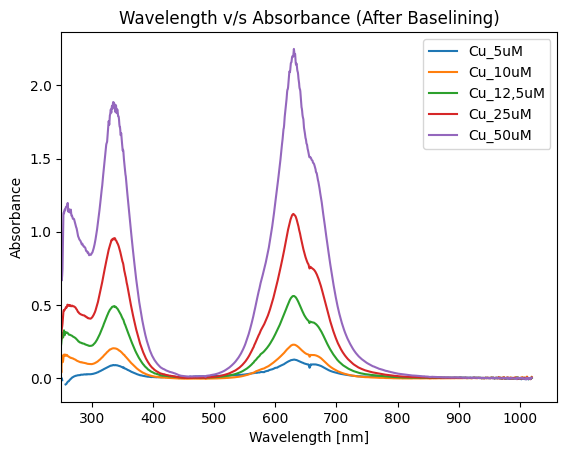

In [21]:
# plotting the baselined data v/s the wavelength

plt.plot(datCu['Wavelength [nm]'],baselined['Cu_5uM'],label = 'Cu_5uM')
plt.plot(datCu['Wavelength [nm]'],baselined['Cu_10uM'],label = 'Cu_10uM')
plt.plot(datCu['Wavelength [nm]'],baselined['Cu_12,5uM'],label = 'Cu_12,5uM')
plt.plot(datCu['Wavelength [nm]'],baselined['Cu_25uM'],label = 'Cu_25uM')
plt.plot(datCu['Wavelength [nm]'],baselined['Cu_50uM'],label = 'Cu_50uM')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Absorbance')
plt.xlim(left = 250)
plt.title('Wavelength v/s Absorbance (After Baselining)')
plt.legend()
plt.show()

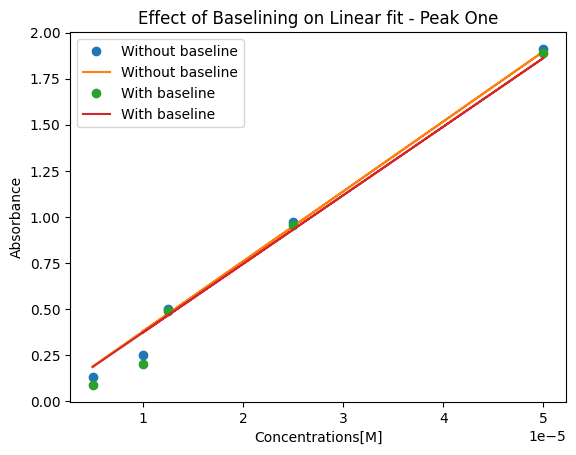

In [22]:
# Compare the linear fit before and after baselining for the first peak

# defining x and y axis
y_baselined1 = baselined[300:310].max()[2:]
x = [10E-6, 12.5E-6, 25E-6, 50E-6, 5E-6]

# defining the function for linear fit
def linear(x, a):
  return(a*x)
fit3 = curve_fit(linear, x, y_baselined1)[0]

# plotting the graphs
plt.plot(x, y_firstmax, 'o',label = 'Without baseline')
plt.plot(x, linear(x, fit1),label = 'Without baseline')
plt.plot(x, y_baselined1, 'o',label = 'With baseline')
plt.plot(x, linear(x, fit3),label = 'With baseline')
plt.xlabel('Concentrations[M]')
plt.ylabel('Absorbance')
plt.title('Effect of Baselining on Linear fit - Peak One')
plt.legend()

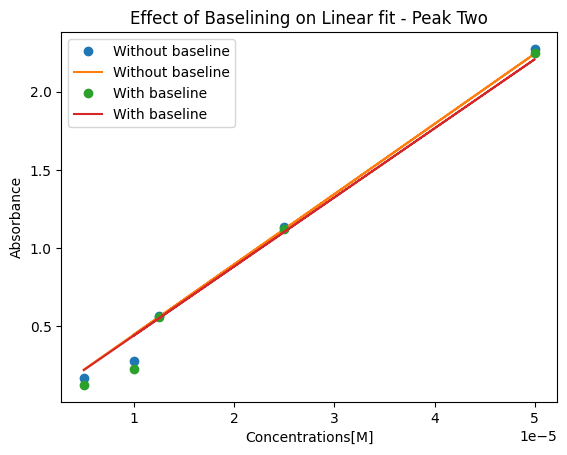

In [23]:
# Compare the linear fit before and after baselining for the second peak

# define the x and y axis
y_baselined2 = baselined[890:905].max()[2:]
x = [10E-6, 12.5E-6, 25E-6, 50E-6, 5E-6] # the concentrations

# define the function for linear fit
def linear(x, a):
  return(a*x)
fit3 = curve_fit(linear, x, y_baselined2)[0]

# plotting the graphs
plt.plot(x, y_secmax, 'o',label = 'Without baseline')
plt.plot(x, linear(x, fit2),label = 'Without baseline')
plt.plot(x, y_baselined2, 'o',label = 'With baseline')
plt.plot(x, linear(x, fit3),label = 'With baseline')
plt.xlabel('Concentrations[M]')
plt.ylabel('Absorbance')
plt.title('Effect of Baselining on Linear fit - Peak Two')
plt.legend()

# Chemometrics
To convert kinetic data to concentration traces, we will use the python module 'pyMCR', it should allready be loaded and set up for you in the first cell of this notebook. A short explination of the method is given in the introductory document. The method requires, kinetic data and initial gueses of either the concentration traces or the spectra of the pure compounds. It is often easiest to use guesses for the spectra of the pure compounds First let's plot the data to get a feeling what is happening. There should be 121 UV-Vis absorption spectra given, so lets plot the data to see what is going on:


Text(0, 0.5, 'Absorbance')

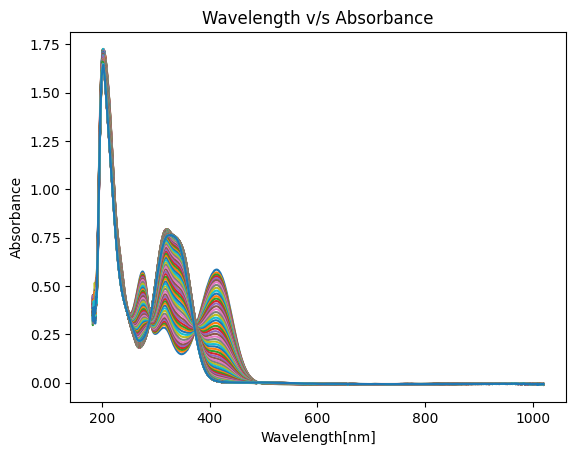

In [24]:
# CHEMOMETRICS

MCR_dat = np.genfromtxt('data-for-topics-in-chemistry-with-python/MCR_data.dat', skip_header=1)     # reads data from a text file into an array
x = MCR_dat[:,0]                                                                                    # extracts the first column,i.e, wavelength
ys = MCR_dat[:,2:]                                                                                  # extracts data from column indexed 3 to 121

plt.plot(x,ys)
plt.title('Wavelength v/s Absorbance')
plt.xlabel('Wavelength[nm]')
plt.ylabel('Absorbance')

Another handy way of looking at this type of data is using a heatmap, make a heatmap using plt.imshow() https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html the data 'ys' is given in the correct format allready. Give the plot a colorbar, and give the axes proper labels.


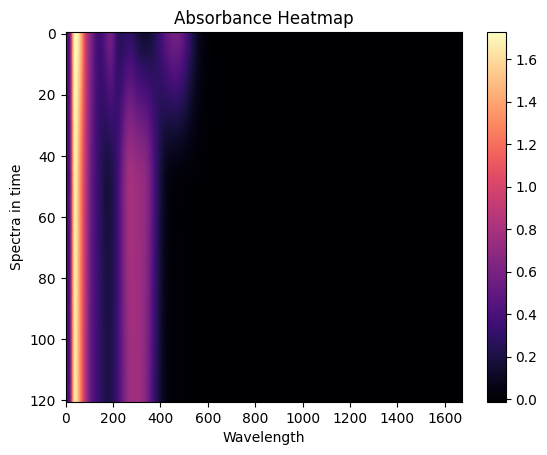

In [25]:
#Plotting Heatmap

x = MCR_dat[:,0]                                          # extracts the first column,i.e, wavelength
ys = MCR_dat[:,2:].T                                      # extracts data from column indexed 3 to 121 and takes a transpose of it

plt.imshow(ys, aspect = 'auto',cmap = 'magma')            # used to display a 2D array as a colormap
plt.colorbar()
plt.xlabel('Wavelength')
plt.ylabel('Spectra in time')
plt.title('Absorbance Heatmap')
plt.show()

# Multivariate Curve Resolution
Now let's analyse the data using chemometrics and see if we can figure out what is going on. We will first try using a two component fit, using the initial and final spectra as initial gueses. The module can be used in the following way. First you need to input settings for the method:
&nbsp;

&nbsp;

mcrar = McrAR(max_iter=1000,  tol_increase=10, tol_err_change=1e-10,st_regr=NNLS(), c_regr=OLS(),
              c_constraints=[ConstraintNonneg()])
&nbsp;

&nbsp;


This is given in the cell below in code and you shouldn't have to change these settings. Next the fitting procedure is started by using:

&nbsp;

mcrar.fit(Data, ST = array_of_intial_guesses)

&nbsp;

Where ST is an array of the initial guesses for spectra. The Data should be in a format of [spectrum 1, spectrum 2 , ..., final spectra] (as ys is allready). If ST contains two spectra, then the fitting assumes a two component fit. If three components are used then it does a three component fit (etc.). To start out is if good to start with a two component fit where the initial guesses are close to spectra for the pure compounds (think of which spectra would be good to use). Do this two component fit to the data. After the analysis is done, (it will output 'exiting'), then you can get out the optimized concentrations using mcrar.C_opt_, and the optimized component spectra using mcrar.ST_opt_.T



Change in err below tol_err_change (6.8239e-11). Exiting.
Change in err below tol_err_change (6.8239e-11). Exiting.


INFO:pymcr.mcr:Change in err below tol_err_change (6.8239e-11). Exiting.


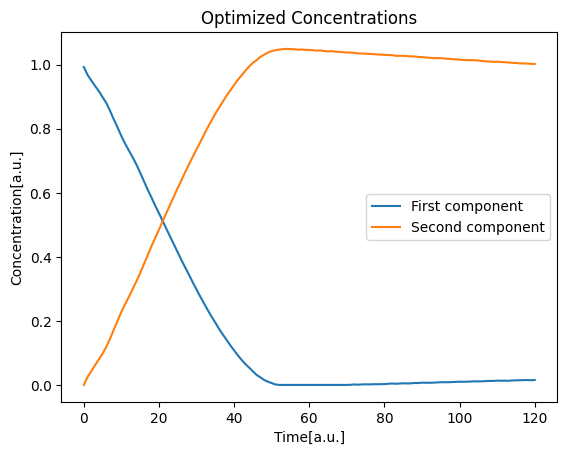

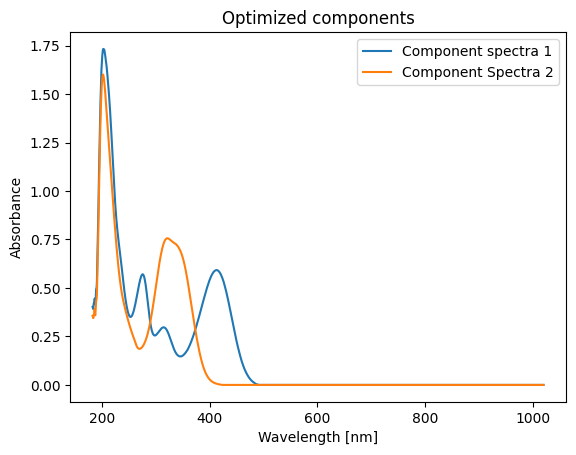

In [26]:
# MULTIVARIATE CURVE RESOLUTION WITH ALTERNATING REGRESSION - TWO COMPONENT FIT
mcrar = McrAR(max_iter=1000,  tol_increase=10, tol_err_change=1e-10,st_regr=NNLS(), c_regr=OLS(),
              c_constraints=[ConstraintNonneg()])                                                 #initialization of McrAR which reasonable settings

x = MCR_dat[:,0]                                            # wavelengths
ys = MCR_dat[:,2:].T                                        # selects column from index 2 onwards and transposes it to store it to 'ys'

guess1 = MCR_dat[:,2]                                       # guess1 = first spectrum
guess2 = MCR_dat[:,122]                                     # guess2 = last spectrum

initial_guesses = np.array([guess1,guess2])                 # creates a numpy array containing the initial guesses
mcrar.fit(ys, ST = initial_guesses)                         # fits the McrAR model to the data 'ys' using the initial guesses provided in the 'ST' paramter to perform iterations

#plot optimized concentration
plt.plot(mcrar.C_opt_)                                      # plotting the optimized concentration matrix obtained from the McrAR model fitting
plt.legend(['First component','Second component'])
plt.xlabel('Time[a.u.]')
plt.ylabel('Concentration[a.u.]')
plt.title('Optimized Concentrations')
plt.show()

#plot optimized component spectra
plt.plot(x, mcrar.ST_opt_.T)                               # plotting the transpose of optimized score matrix against the variable 'x'
plt.legend(['Component spectra 1', 'Component Spectra 2'])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Absorbance')
plt.title('Optimized components')
plt.show()

# Analysing results
If everything went well, then a plot of mcrar.C_opt_ can be interpreted as an approximation of the real kinetic traces of the concentrations of species in an experiment. However when doing a fit to data, you always have to look at the residuals (how far the fit is away from the data). You can calculate the fitted spectra using:
&nbsp;

&nbsp;

predicted = np.dot(mcrar.C_opt_, mcrar.ST_opt_)

&nbsp;

&nbsp;

This might look complicated, but it essentialy the product of the concentrations times the corresponding spectra, at each time component. So intially it might take component 1 * 1 + component 2 * 0. The residuals are given then by:

&nbsp;

residuals = predicted - ys

&nbsp;

Analyse the residuals using a heatmap or sum of squared errors accross one axis (np.sum(residuals**2, axis = 0)) to get the total residual spectrum. (Tip: for the heatmap, use a colormap (cmap) that is diverging i.e. zero is white, look at: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)





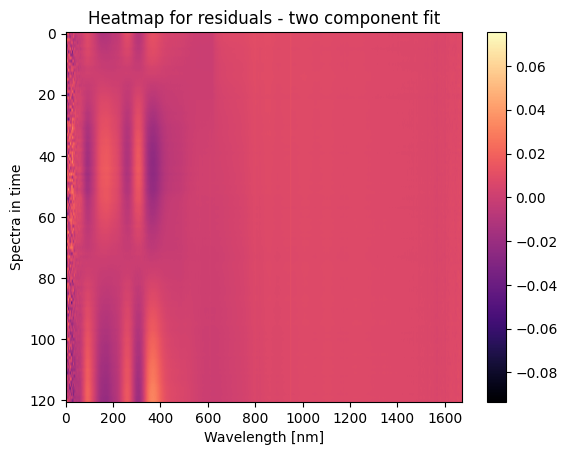

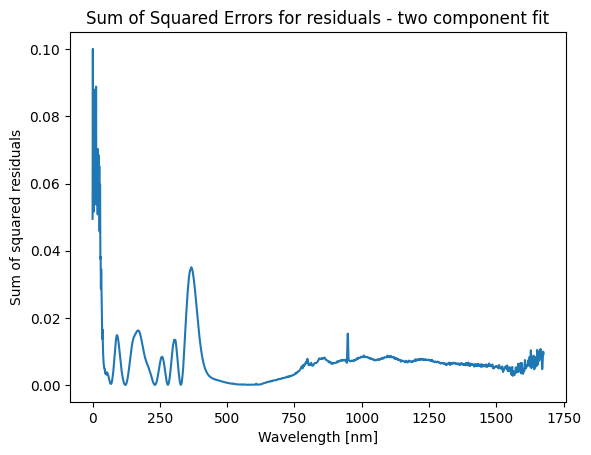

In [27]:
#ANALYSING THE RESIDUALS FOR THE TWO COMPONENT SYSTEM

# Analysing the residuals
predicted = np.dot(mcrar.C_opt_, mcrar.ST_opt_)               # calculates the dot product between the concentration matrix and the score matrix
residuals = predicted - ys                                    # finds the difference between the observed and predicted value and gives an assessment for the goodness of the fit of a model

# Plotting the heatmap for the residuals
plt.imshow(residuals, aspect = 'auto', cmap = 'magma')
plt.colorbar()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spectra in time')
plt.title('Heatmap for residuals - two component fit')
plt.show()

#Plotting the sum of squared errors across one axis for the residuals
s = np.sum(residuals**2, axis = 0)
plt.plot(s)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Sum of squared residuals')
plt.title('Sum of Squared Errors for residuals - two component fit')
plt.show()

# Analysing Residuals
If the fitting is adaquate (i.e. the model is complicated enough the explain the data), then the residuals should have little to no structure, i.e. it should look like random noise distributed at ~0. If there is structure in the residuals above, then add one more component and look at the residuals, are they more random now? Also look at the concntration traces, what sort of mechanism could explain this data?

Hint, if you look through the data carefully you should to be able to find a good guess for a third component spectrum

Change in err below tol_err_change (2.5628e-11). Exiting.
Change in err below tol_err_change (2.5628e-11). Exiting.


INFO:pymcr.mcr:Change in err below tol_err_change (2.5628e-11). Exiting.


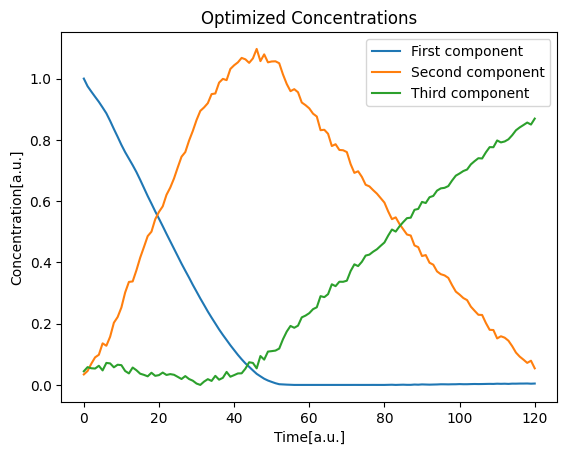

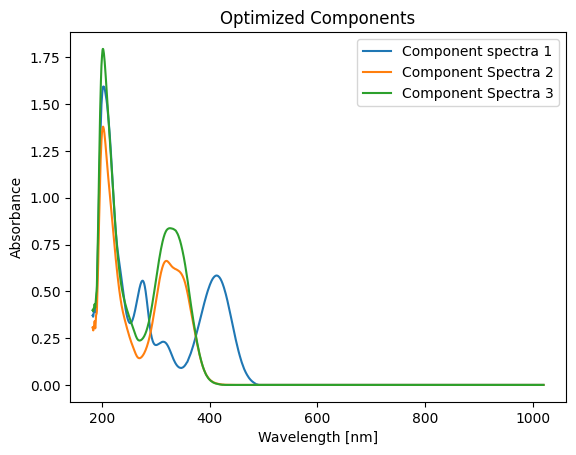

In [28]:
# MULTIVARIATE CURVE RESOLUTION WITH ALTERNATING REGRESSION - THREE COMPONENT FIT
mcrar = McrAR(max_iter=1000,  tol_increase=10, tol_err_change=1e-10,st_regr=NNLS(), c_regr=OLS(),
              c_constraints=[ConstraintNonneg()])                                                 #initialization of McrAR which reasonable settings

x = MCR_dat[:,0]
ys = MCR_dat[:,2:].T

guess1 = MCR_dat[:,2]
guess2 = MCR_dat[:,60]
guess3 = MCR_dat[:,122]

initial_guesses = np.array([guess1,guess2,guess3])
mcrar.fit(ys, ST = initial_guesses)

#plotting the optimized concentration spectra
plt.plot(mcrar.C_opt_)
plt.legend(['First component','Second component','Third component'])
plt.xlabel('Time[a.u.]')
plt.ylabel('Concentration[a.u.]')
plt.title('Optimized Concentrations')
plt.show()

#plot optimized component spectra
plt.plot(x, mcrar.ST_opt_.T)
plt.legend(['Component spectra 1', 'Component Spectra 2','Component Spectra 3'])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Absorbance')
plt.title('Optimized Components')
plt.show()


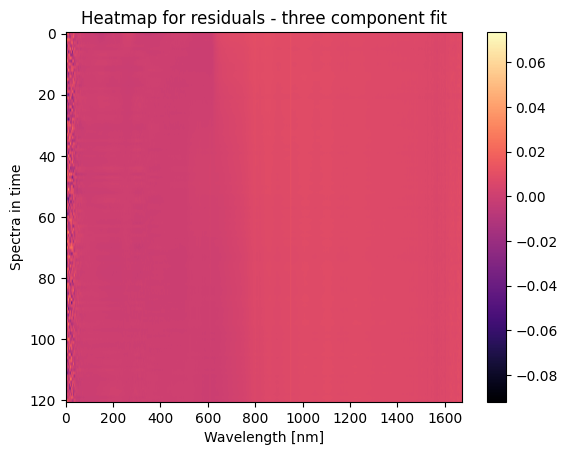

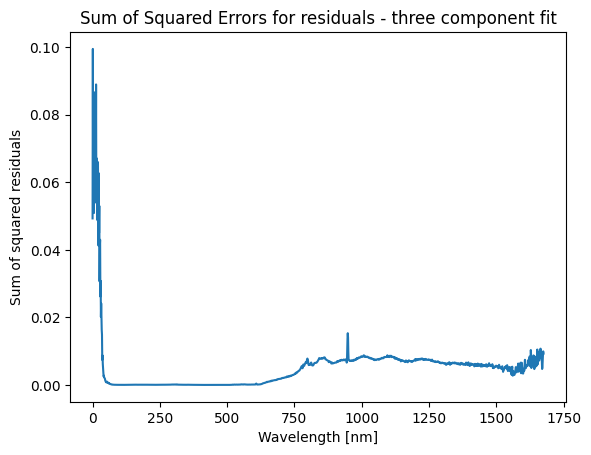

In [29]:
#ANALYSING THE RESIDUALS FOR THE THREE COMPONENT SYSTEM

# Analysing the residuals
predicted = np.dot(mcrar.C_opt_, mcrar.ST_opt_)
residuals = predicted - ys

# Plotting the heatmap for the residuals
plt.imshow(residuals, aspect = 'auto',cmap = 'magma')
plt.colorbar()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spectra in time')
plt.title('Heatmap for residuals - three component fit')
plt.show()

#Plotting the sum of squared errors across one axis for the residuals
s = np.sum(residuals**2, axis = 0)
plt.plot(s)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Sum of squared residuals')
plt.title('Sum of Squared Errors for residuals - three component fit')
plt.show()

In the three component fit, the residuals has much little structure at 0 implying it is a better fit than two component.

# Effect of pre-processing
For UV-Vis absorption spectroscopy, there is often no information obtainable if the absorbance is above ~1. There is a UV-absorbtion in the data which is due to solvent (not the sample) absorbing, there is also no information in the data when the absorbances are 0. So for the analysis it is smart to remove the UV peak and data beyonf 550 nm before doing the MCR. We also see a large residual in these areas. See what the effect is of removing the UV peak and repeating the analyses, does this change the results significantly?

Change in err below tol_err_change (9.9271e-11). Exiting.
Change in err below tol_err_change (9.9271e-11). Exiting.


INFO:pymcr.mcr:Change in err below tol_err_change (9.9271e-11). Exiting.


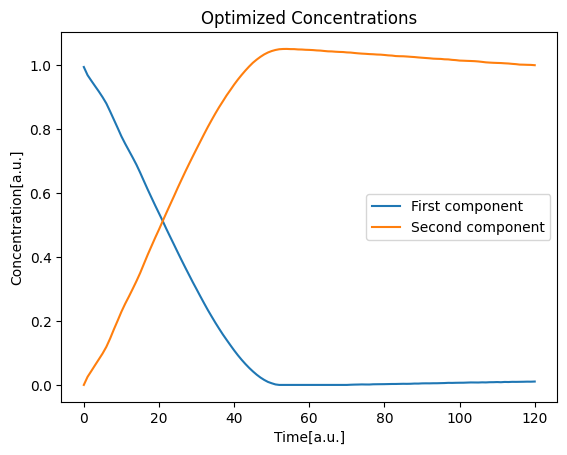

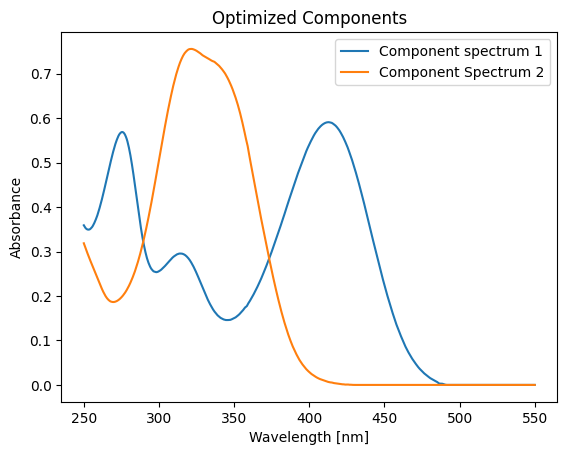

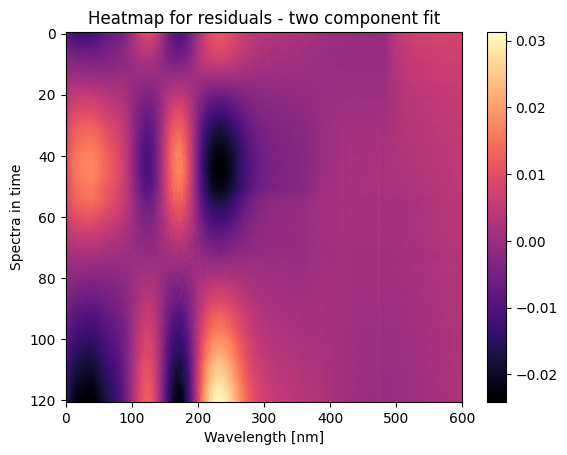

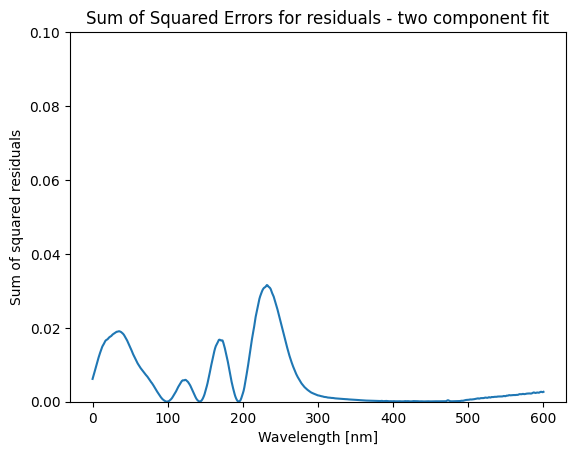

In [30]:
#EFFECT OF PRE-PROCESSING - TWO COMPONENT SYSTEM

# extracting the data after removing the UV peak and the data beyond 550nm
x = MCR_dat[135:736,0]
ys = MCR_dat[135:736,2:].T

guess1 = MCR_dat[135:736,2]
guess2 = MCR_dat[135:736,122]

initial_guesses = np.array([guess1,guess2])
mcrar.fit(ys, ST = initial_guesses)

#plotting the optimized concentration spectra
plt.plot(mcrar.C_opt_)
plt.legend(['First component','Second component'])
plt.xlabel('Time[a.u.]')
plt.ylabel('Concentration[a.u.]')
plt.title('Optimized Concentrations')
plt.show()

#plot optimized component spectra
plt.plot(x, mcrar.ST_opt_.T)
plt.legend(['Component spectrum 1', 'Component Spectrum 2'])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Absorbance')
plt.title('Optimized Components')
plt.show()

# Analysing the residuals
predicted = np.dot(mcrar.C_opt_, mcrar.ST_opt_)
residuals = predicted - ys

# Plotting the heatmap for the residuals
plt.imshow(residuals, aspect = 'auto',cmap='magma')
plt.colorbar()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spectra in time')
plt.title('Heatmap for residuals - two component fit')
plt.show()

#Plotting the sum of squared errors across one axis for the residuals
s = np.sum(residuals**2, axis = 0)
plt.plot(s)
plt.ylim(0.0,0.10)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Sum of squared residuals')
plt.title('Sum of Squared Errors for residuals - two component fit')
plt.show()


Change in err below tol_err_change (6.2780e-11). Exiting.
Change in err below tol_err_change (6.2780e-11). Exiting.


INFO:pymcr.mcr:Change in err below tol_err_change (6.2780e-11). Exiting.


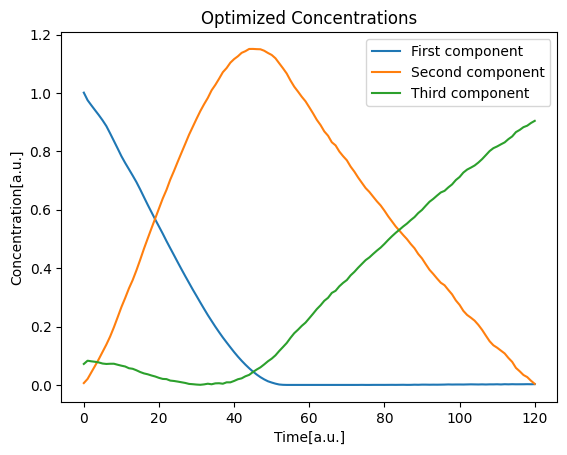

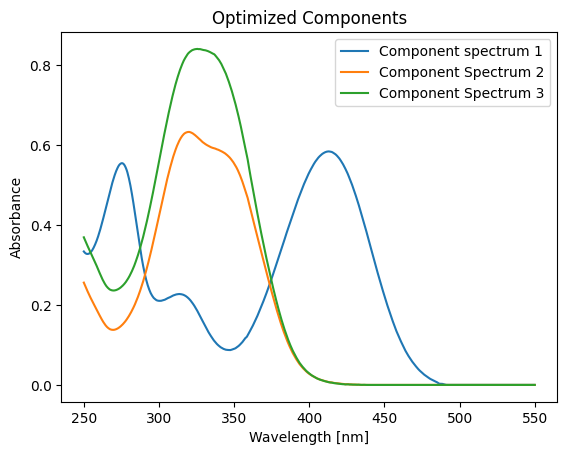

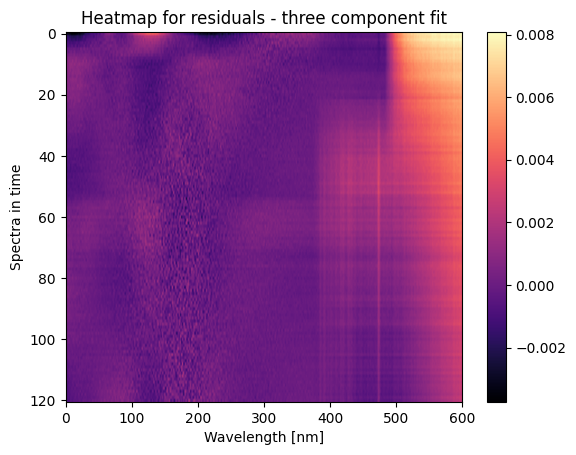

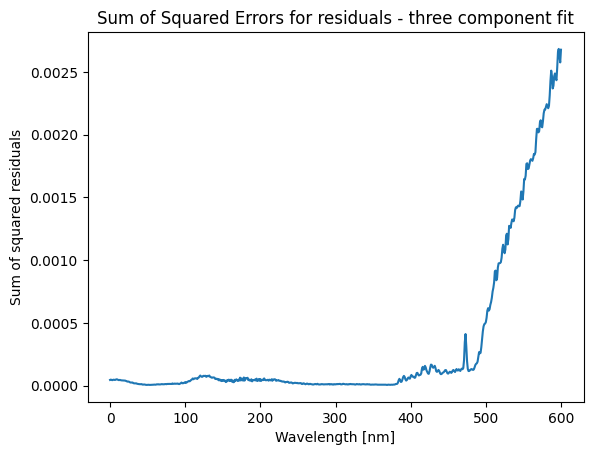

In [31]:
# EFFECT OF PRE-PROCESSING - THREE COMPONENT FIT

x = MCR_dat[135:736,0]
ys = MCR_dat[135:736,2:].T

guess1 = MCR_dat[135:736,2]
guess2 = MCR_dat[135:736,60]
guess3 = MCR_dat[135:736,122]

initial_guesses = np.array([guess1,guess2,guess3])
mcrar.fit(ys, ST = initial_guesses)

#plotting the optimized concentration spectra
plt.plot(mcrar.C_opt_)
plt.legend(['First component','Second component','Third component'])
plt.xlabel('Time[a.u.]')
plt.ylabel('Concentration[a.u.]')
plt.title('Optimized Concentrations')
plt.show()

#plot optimized component spectra
plt.plot(x, mcrar.ST_opt_.T)
plt.legend(['Component spectrum 1', 'Component Spectrum 2','Component Spectrum 3'])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Absorbance')
plt.title('Optimized Components')
plt.show()

# Analysing the residuals
predicted = np.dot(mcrar.C_opt_, mcrar.ST_opt_)
residuals = predicted - ys

# Plotting the heatmap for the residuals
plt.imshow(residuals, aspect = 'auto',cmap='magma')
plt.colorbar()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spectra in time')
plt.title('Heatmap for residuals - three component fit')
plt.show()

#Plotting the sum of squared errors across one axis for the residuals
s = np.sum(residuals**2, axis = 0)
plt.plot(s)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Sum of squared residuals')
plt.title('Sum of Squared Errors for residuals - three component fit')
plt.show()


Ans: Pre-processing improves the fit of the model in case of both two-component and three-component fit by reducing the noise in the residuals.